# Data Collection

In [115]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from tensorflow.keras.layers import Input, Add, Activation, Lambda, Embedding, Reshape, Dot

%matplotlib inline

In [116]:
!gdown --id "1FuRZhGKHEYLN4qoEzEKF2A7tuAG0fPyj"

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1FuRZhGKHEYLN4qoEzEKF2A7tuAG0fPyj
To: /content/Coursera.csv
100% 5.28M/5.28M [00:00<00:00, 208MB/s]


In [117]:
courses = pd.read_csv("/content/Coursera.csv")
courses.head(10)

Course Name  \
0  Write A Feature Length Screenplay For Film Or ...   
1  Business Strategy: Business Model Canvas Analy...   
2                      Silicon Thin Film Solar Cells   
3                               Finance for Managers   
4       Retrieve Data using Single-Table SQL Queries   
5  Building Test Automation Framework using Selen...   
6                   Doing Business in China Capstone   
7                      Programming Languages, Part A   
8  The Roles and Responsibilities of Nonprofit Bo...   
9             Business Russian Communication. Part 3   

                            University Difficulty Level   Course Rating  \
0            Michigan State University         Beginner             4.8   
1             Coursera Project Network         Beginner             4.8   
2                  �cole Polytechnique         Advanced             4.1   
3                 IESE Business School     Intermediate             4.8   
4             Coursera Project Network         Beginner             4.6   
5             Coursera Project Network         Beginner             4.7   
6  The Chinese University of Hong Kong         Advanced             3.3   
7             University of Washington     Intermediate             4.9   
8     The State University of New York     Intermediate             4.3   
9    Saint Petersburg State University     Intermediate  Not Calibrated   

                                          Course URL  \
0  https://www.coursera.org/learn/write-a-feature...   
1  https://www.coursera.org/learn/canvas-analysis...   
2  https://www.coursera.org/learn/silicon-thin-fi...   
3  https://www.coursera.org/learn/operational-fin...   
4  https://www.coursera.org/learn/single-table-sq...   
5  https://www.coursera.org/learn/building-test-a...   
6  https://www.coursera.org/learn/doing-business-...   
7  https://www.coursera.org/learn/programming-lan...   
8     https://www.coursera.org/learn/nonprofit-gov-2   
9  https://www.coursera.org/learn/business-russia...   

                                  Course Description  \
0  Write a Full Length Feature Film Script  In th...   
1  By the end of this guided project, you will be...   
2  This course consists of a general presentation...   
3  When it comes to numbers, there is always more...   
4  In this course you�ll learn how to effectively...   
5  Selenium is one of the most widely used functi...   
6  Doing Business in China Capstone enables you t...   
7  This course is an introduction to the basic co...   
8  This course provides a more in-depth look at t...   
9  Russian is considered to be one of the most di...   

                                              Skills  
0  Drama  Comedy  peering  screenwriting  film  D...  
1  Finance  business plan  persona (user experien...  
2  chemistry  physics  Solar Energy  film  lambda...  
3  accounts receivable  dupont analysis  analysis...  
4  Data Analysis  select (sql)  database manageme...  
5  maintenance  test case  test automation  scree...  
6  marketing plan  Planning  Marketing  consumpti...  
7  inference  ml (programming language)  higher-o...  
8  Planning  Peer Review  fundraising  strategic ...  
9  Russian  market (economics)  tax exemption  co...

# Data Understanding


In [118]:
courses.shape

(3522, 7)

In [119]:
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522 entries, 0 to 3521
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Course Name         3522 non-null   object
 1   University          3522 non-null   object
 2   Difficulty Level    3522 non-null   object
 3   Course Rating       3522 non-null   object
 4   Course URL          3522 non-null   object
 5   Course Description  3522 non-null   object
 6   Skills              3522 non-null   object
dtypes: object(7)
memory usage: 192.7+ KB


In [120]:
courses.describe()

Course Name  \
count                                                3522   
unique                                               3416   
top     Google Cloud Platform Fundamentals: Core Infra...   
freq                                                    8   

                      University Difficulty Level Course Rating  \
count                       3522             3522          3522   
unique                       184                5            31   
top     Coursera Project Network         Beginner           4.7   
freq                         562             1444           740   

                                             Course URL  \
count                                              3522   
unique                                             3424   
top     https://www.coursera.org/learn/gcp-fundamentals   
freq                                                  8   

                                       Course Description  \
count                                                3522   
unique                                               3397   
top     This course introduces you to important concep...   
freq                                                    8   

                                                   Skills  
count                                                3522  
unique                                               3424  
top     Google Cloud Platform  Big Data  Cloud Infrast...  
freq                                                    8

In [121]:
courses['Course Name']

0       Write A Feature Length Screenplay For Film Or ...
1       Business Strategy: Business Model Canvas Analy...
2                           Silicon Thin Film Solar Cells
3                                    Finance for Managers
4            Retrieve Data using Single-Table SQL Queries
                              ...                        
3517    Capstone: Retrieving, Processing, and Visualiz...
3518                     Patrick Henry: Forgotten Founder
3519    Business intelligence and data analytics: Gene...
3520                                  Rigid Body Dynamics
3521    Architecting with Google Kubernetes Engine: Pr...
Name: Course Name, Length: 3522, dtype: object

In [122]:
courses['University'].value_counts()

Coursera Project Network                      562
University of Illinois at Urbana-Champaign    138
Johns Hopkins University                      110
University of Michigan                        101
University of Colorado Boulder                101
                                             ... 
GitLab                                          1
Yeshiva University                              1
University of Glasgow                           1
Laureate Education                              1
The World Bank Group                            1
Name: University, Length: 184, dtype: int64

In [123]:
courses['Difficulty Level'].value_counts()

Beginner          1444
Advanced          1005
Intermediate       837
Conversant         186
Not Calibrated      50
Name: Difficulty Level, dtype: int64

In [124]:
courses['Course Rating'].value_counts()

4.7               740
4.6               623
4.8               598
4.5               389
4.4               242
4.9               180
4.3               165
4.2               121
5                  90
4.1                85
Not Calibrated     82
4                  51
3.8                24
3.9                20
3.6                18
3.7                18
3.5                17
3.4                13
3                  12
3.2                 9
3.3                 6
2.9                 6
2.6                 2
2.8                 2
2.4                 2
1                   2
2                   1
3.1                 1
2.5                 1
1.9                 1
2.3                 1
Name: Course Rating, dtype: int64

In [125]:
courses['Skills'].value_counts()

Google Cloud Platform  Big Data  Cloud Infrastructure  google storage  Cloud Storage  bigquery  Cloud Platforms  Kubernetes  Cloud Computing  Google App Engine information-technology cloud-computing                                  8
art  listening  emotions  Sound Design  music  signature  Audio Production  Writing  microphone  sound arts-and-humanities music-and-art                                                                                                4
Python Programming  python libraries  analysis  semantics  Computer Programming  syntax  Data Analysis  Pandas  python syntax and semantics  Numpy data-science data-analysis                                                           4
analysis  Machine Learning  Data Mining  Artificial Neural Networks  Regression Analysis  Data Analysis  data reporting  Human Learning  Regression  Big Data data-science data-analysis                                                4
Machine Learning  artificial general intelligence  application d

In [126]:
courses.head(5)

Course Name  \
0  Write A Feature Length Screenplay For Film Or ...   
1  Business Strategy: Business Model Canvas Analy...   
2                      Silicon Thin Film Solar Cells   
3                               Finance for Managers   
4       Retrieve Data using Single-Table SQL Queries   

                  University Difficulty Level Course Rating  \
0  Michigan State University         Beginner           4.8   
1   Coursera Project Network         Beginner           4.8   
2        �cole Polytechnique         Advanced           4.1   
3       IESE Business School     Intermediate           4.8   
4   Coursera Project Network         Beginner           4.6   

                                          Course URL  \
0  https://www.coursera.org/learn/write-a-feature...   
1  https://www.coursera.org/learn/canvas-analysis...   
2  https://www.coursera.org/learn/silicon-thin-fi...   
3  https://www.coursera.org/learn/operational-fin...   
4  https://www.coursera.org/learn/single-table-sq...   

                                  Course Description  \
0  Write a Full Length Feature Film Script  In th...   
1  By the end of this guided project, you will be...   
2  This course consists of a general presentation...   
3  When it comes to numbers, there is always more...   
4  In this course you�ll learn how to effectively...   

                                              Skills  
0  Drama  Comedy  peering  screenwriting  film  D...  
1  Finance  business plan  persona (user experien...  
2  chemistry  physics  Solar Energy  film  lambda...  
3  accounts receivable  dupont analysis  analysis...  
4  Data Analysis  select (sql)  database manageme...

# Data Preparation


In [127]:
import numpy as np
import itertools

In [128]:
# Drop outliers menggunakan IQR
Q1 = courses.quantile(0.25)
Q3 = courses.quantile(0.75)
IQR=Q3-Q1
course=courses[~((courses<(Q1-1.5*IQR))|(courses>(Q3+1.5*IQR))).any(axis=1)]

# Cek ukuran dataset setelah kita drop outliers
course.shape

<ipython-input-128-f782804909ae>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = courses.quantile(0.25)
<ipython-input-128-f782804909ae>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = courses.quantile(0.75)
<ipython-input-128-f782804909ae>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  course=courses[~((courses<(Q1-1.5*IQR))|(courses>(Q3+1.5*IQR))).any(axis=1)]


(3522, 7)

In [129]:
# Mengatasi missing value
course.isnull().sum()

Course Name           0
University            0
Difficulty Level      0
Course Rating         0
Course URL            0
Course Description    0
Skills                0
dtype: int64

In [130]:
# Mengambil kolom yang diperlukan
courses = course[['Course Name','Course Rating', 'Course Description', 'Skills']]

In [131]:
# Mengubah nama kolom
courses = courses.rename(columns={
    'Course Name': 'courseName',
    'Course Rating': 'rating',
    'Course Description': 'description',
    'Skills': 'skills'
})

In [132]:
courses = courses.merge(courses[['courseName', 'description']], on='courseName')
courses.head()

courseName rating  \
0  Write A Feature Length Screenplay For Film Or ...    4.8   
1  Business Strategy: Business Model Canvas Analy...    4.8   
2                      Silicon Thin Film Solar Cells    4.1   
3                               Finance for Managers    4.8   
4       Retrieve Data using Single-Table SQL Queries    4.6   

                                       description_x  \
0  Write a Full Length Feature Film Script  In th...   
1  By the end of this guided project, you will be...   
2  This course consists of a general presentation...   
3  When it comes to numbers, there is always more...   
4  In this course you�ll learn how to effectively...   

                                              skills  \
0  Drama  Comedy  peering  screenwriting  film  D...   
1  Finance  business plan  persona (user experien...   
2  chemistry  physics  Solar Energy  film  lambda...   
3  accounts receivable  dupont analysis  analysis...   
4  Data Analysis  select (sql)  database manageme...   

                                       description_y  
0  Write a Full Length Feature Film Script  In th...  
1  By the end of this guided project, you will be...  
2  This course consists of a general presentation...  
3  When it comes to numbers, there is always more...  
4  In this course you�ll learn how to effectively...

In [133]:
# Exclude rating yang ingin dihapus dari dataset
courses = courses[courses['rating'] != 'Not Calibrated']

# Reset index dataframe untuk menghindari error
courses = courses.reset_index(drop = True)

# Convert "rating" column to int64 data type
courses['rating'] = pd.to_numeric(courses['rating'])

In [134]:
courses.head(5)

courseName  rating  \
0  Write A Feature Length Screenplay For Film Or ...     4.8   
1  Business Strategy: Business Model Canvas Analy...     4.8   
2                      Silicon Thin Film Solar Cells     4.1   
3                               Finance for Managers     4.8   
4       Retrieve Data using Single-Table SQL Queries     4.6   

                                       description_x  \
0  Write a Full Length Feature Film Script  In th...   
1  By the end of this guided project, you will be...   
2  This course consists of a general presentation...   
3  When it comes to numbers, there is always more...   
4  In this course you�ll learn how to effectively...   

                                              skills  \
0  Drama  Comedy  peering  screenwriting  film  D...   
1  Finance  business plan  persona (user experien...   
2  chemistry  physics  Solar Energy  film  lambda...   
3  accounts receivable  dupont analysis  analysis...   
4  Data Analysis  select (sql)  database manageme...   

                                       description_y  
0  Write a Full Length Feature Film Script  In th...  
1  By the end of this guided project, you will be...  
2  This course consists of a general presentation...  
3  When it comes to numbers, there is always more...  
4  In this course you�ll learn how to effectively...

In [135]:
course_list = courses.courseName.str.split("|").tolist()
course = list(set(itertools.chain(*course_list)))
course = list(set(course))

In [136]:
skills_list = courses.skills.str.split("|").tolist()
skills = list(set(itertools.chain(*skills_list)))
skills = list(set(skills))

# Model Development dengan Content Based Filtering

TF-IDF Vectorizer

In [137]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer(token_pattern=r"(?u)\b\w[\w-]*\w\b")

# Melakukan perhitungan idf pada data cuisine
tf.fit(courses['courseName'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['000', '10', '101', ..., 'zap', 'zero', 'zoning'], dtype=object)

In [138]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(courses['courseName'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(3740, 3628)

In [139]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [140]:
# Membuat dataframe untuk melihat tf-idf matrix
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=courses.skills
).sample(10, axis=1).sample(10, axis=0)

container  observability  \
skills                                                                         
schedule  Accounting  time management  project ...        0.0            0.0   
Exploratory Data Analysis  R Programming  Compu...        0.0            0.0   
proof-of-stake  bitcoin  internet  public-key c...        0.0            0.0   
backtesting  expected return  trading strategy ...        0.0            0.0   
hypothesis  Statistical Analysis  clinical rese...        0.0            0.0   
Cloud Platforms  virtual private networks  Goog...        0.0            0.0   
digitizing  Strategy  digital strategy  Innovat...        0.0            0.0   
Machine Learning  encodings  Artificial Neural ...        0.0            0.0   
materials  SPSS  business analytics  analytics ...        0.0            0.0   
web  Javascript  responsive web design  html  w...        0.0            0.0   

                                                    tzliches  news  \
skills                                                               
schedule  Accounting  time management  project ...       0.0   0.0   
Exploratory Data Analysis  R Programming  Compu...       0.0   0.0   
proof-of-stake  bitcoin  internet  public-key c...       0.0   0.0   
backtesting  expected return  trading strategy ...       0.0   0.0   
hypothesis  Statistical Analysis  clinical rese...       0.0   0.0   
Cloud Platforms  virtual private networks  Goog...       0.0   0.0   
digitizing  Strategy  digital strategy  Innovat...       0.0   0.0   
Machine Learning  encodings  Artificial Neural ...       0.0   0.0   
materials  SPSS  business analytics  analytics ...       0.0   0.0   
web  Javascript  responsive web design  html  w...       0.0   0.0   

                                                    multilevel  connecting  \
skills                                                                       
schedule  Accounting  time management  project ...         0.0         0.0   
Exploratory Data Analysis  R Programming  Compu...         0.0         0.0   
proof-of-stake  bitcoin  internet  public-key c...         0.0         0.0   
backtesting  expected return  trading strategy ...         0.0         0.0   
hypothesis  Statistical Analysis  clinical rese...         0.0         0.0   
Cloud Platforms  virtual private networks  Goog...         0.0         0.0   
digitizing  Strategy  digital strategy  Innovat...         0.0         0.0   
Machine Learning  encodings  Artificial Neural ...         0.0         0.0   
materials  SPSS  business analytics  analytics ...         0.0         0.0   
web  Javascript  responsive web design  html  w...         0.0         0.0   

                                                    semantic  fundamentals  \
skills                                                                       
schedule  Accounting  time management  project ...       0.0           0.0   
Exploratory Data Analysis  R Programming  Compu...       0.0           0.0   
proof-of-stake  bitcoin  internet  public-key c...       0.0           0.0   
backtesting  expected return  trading strategy ...       0.0           0.0   
hypothesis  Statistical Analysis  clinical rese...       0.0           0.0   
Cloud Platforms  virtual private networks  Goog...       0.0           0.0   
digitizing  Strategy  digital strategy  Innovat...       0.0           0.0   
Machine Learning  encodings  Artificial Neural ...       0.0           0.0   
materials  SPSS  business analytics  analytics ...       0.0           0.0   
web  Javascript  responsive web design  html  w...       0.0           0.0   

                                                    localization  cities  
skills                                                                    
schedule  Accounting  time management  project ...           0.0     0.0  
Exploratory Data Analysis  R Programming  Compu...           0.0     0.0  
proof-of-stake  bitcoin  internet  public-key c...           0.0     0.0  
b

Cosine Similarity

In [141]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.        , 0.15356638, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.15163383, 0.        ,
        0.0421248 ],
       [0.15356638, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.15163383, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.0421248 , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [142]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama course
cosine_sim_df = pd.DataFrame(cosine_sim, index=courses['courseName'], columns=courses['courseName'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap course
cosine_sim_df.sample(10, axis=1).sample(10, axis=0)

Shape: (3740, 3740)


courseName                                          Data Science in Real Life  \
courseName                                                                      
Facial Expression Classification Using Residual...                        0.0   
AI Workflow: Machine Learning, Visual Recogniti...                        0.0   
Cloud Computing Concepts: Part 2                                          0.0   
CAPSTONE: Your Leadership Challenge                                       0.0   
API Security on Google Cloud's Apigee API Platform                        0.0   
Introduction to Formal Concept Analysis                                   0.0   
Python Dynamic HTML Web Server                                            0.0   
Simple Nearest Neighbors Regression and Classif...                        0.0   
Serious Gaming                                                            0.0   
Foundations of Public Health Practice: Health P...                        0.0   

courseName                                          Google Cloud Platform Fundamentals: Core Infrastructure  \
courseName                                                                                                    
Facial Expression Classification Using Residual...                                           0.000000         
AI Workflow: Machine Learning, Visual Recogniti...                                           0.000000         
Cloud Computing Concepts: Part 2                                                             0.144417         
CAPSTONE: Your Leadership Challenge                                                          0.000000         
API Security on Google Cloud's Apigee API Platform                                           0.278920         
Introduction to Formal Concept Analysis                                                      0.000000         
Python Dynamic HTML Web Server                                                               0.000000         
Simple Nearest Neighbors Regression and Classif...                                           0.000000         
Serious Gaming                                                                               0.000000         
Foundations of Public Health Practice: Health P...                                           0.000000         

courseName                                          Production Machine Learning Systems  \
courseName                                                                                
Facial Expression Classification Using Residual...                              0.00000   
AI Workflow: Machine Learning, Visual Recogniti...                              0.24298   
Cloud Computing Concepts: Part 2                                                0.00000   
CAPSTONE: Your Leadership Challenge                                             0.00000   
API Security on Google Cloud's Apigee API Platform                              0.00000   
Introduction to Formal Concept Analysis                                         0.00000   
Python Dynamic HTML Web Server                                                  0.00000   
Simple Nearest Neighbors Regression and Classif...                              0.00000   
Serious Gaming                                                                  0.00000   
Foundations of Public Health Practice: Health P...                              0.00000   

courseName                                          Principles of Photo Composition and Digital Image Post-Production  \
courseName                                                                                                              
Facial Expression Classification Using Residual...                                           0.000000                   
AI Workflow: Machine Learning, Visual Recogniti...                                           0.017733                   
Cloud Computing Concepts: Part 2                                                             0.000000                

In [143]:
print(cosine_sim_df.sample(5, axis=1).sample(10, axis=0).to_markdown())

| courseName                                                        |   RPA Lifecycle: Development and Testing |   Agile Planning for Software Products |   Create a Simple Project Timeline in Google Sheets |   Create Your First Web App with Python and Flask |   Electronic Music Performance Techniques |
|:------------------------------------------------------------------|-----------------------------------------:|---------------------------------------:|----------------------------------------------------:|--------------------------------------------------:|------------------------------------------:|
| Machine Learning for Business Professionals                       |                                0         |                              0.0723808 |                                           0         |                                         0         |                                         0 |
| Natural Language Processing in TensorFlow                         |                   

Euclidean Distance

In [144]:
# Menghitung euclidean distance pada matrix tf-idf
euclidean_dist = euclidean_distances(tfidf_matrix)

# Membuat dataframe dari variabel euclidean_dist dengan baris dan kolom berupa nama course
euclidean_dist_df = pd.DataFrame(euclidean_dist, index=courses.courseName, columns=courses.courseName)

In [145]:
euclidean_dist_df.sample(5, axis=1).sample(10, axis=0)

courseName                                          Data Science Capstone  \
courseName                                                                  
Containerize a full-stack NodeJS application in...               1.414214   
Investments I: Fundamentals of Performance Eval...               1.414214   
The Business of Cybersecurity Capstone                           1.185871   
Advanced Linear Models for Data Science 2: Stat...               1.253738   
Global Financial Markets and Instruments                         1.414214   
Getting Started with Azure DevOps Boards                         1.414214   
Object Oriented Programming in Java                              1.414214   
Practical Machine Learning                                       1.414214   
Building Smart Business Assistants with IBM Watson               1.414214   
Healthcare Consumerism and Implication for Care...               1.414214   

courseName                                          Exploratory Data Analysis  \
courseName                                                                      
Containerize a full-stack NodeJS application in...                   1.414214   
Investments I: Fundamentals of Performance Eval...                   1.414214   
The Business of Cybersecurity Capstone                               1.414214   
Advanced Linear Models for Data Science 2: Stat...                   1.362958   
Global Financial Markets and Instruments                             1.414214   
Getting Started with Azure DevOps Boards                             1.414214   
Object Oriented Programming in Java                                  1.414214   
Practical Machine Learning                                           1.414214   
Building Smart Business Assistants with IBM Watson                   1.414214   
Healthcare Consumerism and Implication for Care...                   1.414214   

courseName                                          Connecting with Sales Prospects  \
courseName                                                                            
Containerize a full-stack NodeJS application in...                         1.414214   
Investments I: Fundamentals of Performance Eval...                         1.414214   
The Business of Cybersecurity Capstone                                     1.414214   
Advanced Linear Models for Data Science 2: Stat...                         1.414214   
Global Financial Markets and Instruments                                   1.414214   
Getting Started with Azure DevOps Boards                                   1.379700   
Object Oriented Programming in Java                                        1.414214   
Practical Machine Learning                                                 1.414214   
Building Smart Business Assistants with IBM Watson                         1.380937   
Healthcare Consumerism and Implication for Care...                         1.414214   

courseName                                          Networking in Google Cloud: Defining and Implementing Networks  \
courseName                                                                                                           
Containerize a full-stack NodeJS application in...                                           1.388811                
Investments I: Fundamentals of Performance Eval...                                           1.414214                
The Business of Cybersecurity Capstone                                                       1.414214                
Advanced Linear Models for Data Science 2: Stat...                                           1.414214                
Global Financial Markets and Instruments                                                     1.396173                
Getting Started with Azure DevOps Boards                                                     1.414214                
Object Oriented Programming in Java                                                          1.379884            

In [146]:
print(euclidean_dist_df.sample(5, axis=1).sample(10, axis=0).to_markdown())

| courseName                                               |   Service-Oriented Architecture |   Essential Google Cloud Infrastructure: Foundation |   Sales Training: Inbound Business Strategy |   Python Programming Essentials |   Pro Tools Basics |
|:---------------------------------------------------------|--------------------------------:|----------------------------------------------------:|--------------------------------------------:|--------------------------------:|-------------------:|
| Google Cloud Platform Fundamentals: Core Infrastructure  |                         1.41421 |                                             1.06758 |                                     1.41421 |                         1.41421 |            1.41421 |
| Plant Bioinformatics Capstone                            |                         1.41421 |                                             1.41421 |                                     1.41421 |                         1.41421 |            1.41421 |


# Model Development dengan Collaborative Filtering

In [147]:
# Import library
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [148]:
# Mengubah courseName menjadi list tanpa nilai yang sama
course_name_list_id = courses['courseName'].unique().tolist()
print('list courseName: ', course_name_list_id)

# Melakukan encoding courseName (cn)
cn_to_cn_encoded = {x: i for i, x in enumerate(course_name_list_id)}
print('encoded courseName : ', cn_to_cn_encoded)

# Melakukan proses encoding angka ke ke courseName (cn)
cn_encoded_to_cn = {i: x for i, x in enumerate(course_name_list_id)}
print('encoded angka ke courseName: ', cn_encoded_to_cn)

list courseName:  ['Write A Feature Length Screenplay For Film Or Television', 'Business Strategy: Business Model Canvas Analysis with Miro', 'Silicon Thin Film Solar Cells', 'Finance for Managers', 'Retrieve Data using Single-Table SQL Queries', 'Building Test Automation Framework using Selenium and TestNG', 'Doing Business in China Capstone', 'Programming Languages, Part A', 'The Roles and Responsibilities of Nonprofit Boards of Directors within the Governance Process', 'Agile Projects:  Developing Tasks with Taiga', 'Esports Management Capstone Project', 'Hacking and Patching', 'Business Statistics and Analysis Capstone', 'Grab Data Fast with Vertical and Horizontal LOOKUP', 'Global Health: An Interdisciplinary Overview', 'Python Programming Essentials', 'Creating Dashboards and Storytelling with Tableau', 'Parallel programming', 'Recommendation Systems with TensorFlow on GCP', 'The Changing Arctic', 'COVID-19 - A clinical update', 'How to Create Text Effects in GIMP', 'Preparing fo

In [149]:
# Mengubah skills menjadi list tanpa nilai yang sama
skill_list_id = courses['skills'].unique().tolist()
print('list skills: ', skill_list_id)

# Melakukan encoding skills
skill_to_skill_encoded = {x: i for i, x in enumerate(skill_list_id)}
print('encoded skills : ', skill_to_skill_encoded)

# Melakukan proses encoding angka ke ke skills
skill_encoded_to_skill = {i: x for i, x in enumerate(skill_list_id)}
print('encoded angka ke skills: ', skill_encoded_to_skill)

list skills:  ['Drama  Comedy  peering  screenwriting  film  Document Review  dialogue  creative writing  Writing  unix shells arts-and-humanities music-and-art', 'Finance  business plan  persona (user experience)  business model canvas  Planning  Business  project  Product Development  presentation  Strategy business business-strategy', 'chemistry  physics  Solar Energy  film  lambda calculus  Electrical Engineering  electronics  energy  silicon  thinning physical-science-and-engineering electrical-engineering', 'accounts receivable  dupont analysis  analysis  Accounting  Finance  Operations Management  Leadership and Management  balance sheet  inventory  Financial Analysis business finance', 'Data Analysis  select (sql)  database management systems  online shopping  table (database)  data retrieval  Databases  web page  numbers (spreadsheet)  SQL information-technology data-management', 'maintenance  test case  test automation  screenshot  project  helper class  selenium  reusability

In [150]:
# Mapping courseName list ke dataframe courses
courses['courses_df'] = courses['courseName'].map(cn_to_cn_encoded)

# Mapping skills ke dataframe skills
courses['skills_df'] = courses['skills'].map(skill_to_skill_encoded)

In [151]:
courses

courseName  rating  \
0     Write A Feature Length Screenplay For Film Or ...     4.8   
1     Business Strategy: Business Model Canvas Analy...     4.8   
2                         Silicon Thin Film Solar Cells     4.1   
3                                  Finance for Managers     4.8   
4          Retrieve Data using Single-Table SQL Queries     4.6   
...                                                 ...     ...   
3735  Capstone: Retrieving, Processing, and Visualiz...     4.6   
3736                   Patrick Henry: Forgotten Founder     4.9   
3737  Business intelligence and data analytics: Gene...     4.6   
3738                                Rigid Body Dynamics     4.6   
3739  Architecting with Google Kubernetes Engine: Pr...     4.7   

                                          description_x  \
0     Write a Full Length Feature Film Script  In th...   
1     By the end of this guided project, you will be...   
2     This course consists of a general presentation...   
3     When it comes to numbers, there is always more...   
4     In this course you�ll learn how to effectively...   
...                                                 ...   
3735  In the capstone, students will build a series ...   
3736  �Give me liberty, or give me death:� Rememberi...   
3737  �Megatrends� heavily influence today�s organis...   
3738  This course teaches dynamics, one of the basic...   
3739  In this course, "Architecting with Google Kube...   

                                                 skills  \
0     Drama  Comedy  peering  screenwriting  film  D...   
1     Finance  business plan  persona (user experien...   
2     chemistry  physics  Solar Energy  film  lambda...   
3     accounts receivable  dupont analysis  analysis...   
4     Data Analysis  select (sql)  database manageme...   
...                                                 ...   
3735  Databases  syntax  analysis  web  Data Visuali...   
3736  retirement  Causality  career  history of the ...   
3737  analytics  tableau software  Business Intellig...   
3738  Angular  Mechanical Design  fluid mechanics  F...   
3739  bigtable  bigquery  SQL  Google Cloud Platform...   

                                          description_y  courses_df  skills_df  
0     Write a Full Length Feature Film Script  In th...           0          0  
1     By the end of this guided project, you will be...           1          1  
2     This course consists of a general presentation...           2          2  
3     When it comes to numbers, there is always more...           3          3  
4     In this course you�ll learn how to effectively...           4          4  
...                                                 ...         ...        ...  
3735  In the capstone, students will build a series ...        3329       3337  
3736  �Give me liberty, or give me death:� Rememberi...        3330       3338  
3737  �Megatrends� heavily influence today�s organis...        3331       3339  
3738  This course teaches dynamics, one of the basic...        3332       3340  
3739  In this course, "Architecting with Google Kube...        3333       3341  

[3740 rows x 7 columns]

In [152]:
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3740 entries, 0 to 3739
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   courseName     3740 non-null   object 
 1   rating         3740 non-null   float64
 2   description_x  3740 non-null   object 
 3   skills         3740 non-null   object 
 4   description_y  3740 non-null   object 
 5   courses_df     3740 non-null   int64  
 6   skills_df      3740 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 204.7+ KB


In [153]:
# Mendapatkan jumlah courseName
num_courses = len(cn_to_cn_encoded)

# Mendapatkan jumlah skills
num_skills = len(skill_to_skill_encoded)

# Nilai minimum rating
min_rating = min(courses['rating'])

# Nilai maksimal rating
max_rating = max(courses['rating'])

print('Number of Course: {}, Number of Skill: {}, Min rating: {}, Max rating: {}'.format(
    num_courses, num_skills, min_rating, max_rating
))

Number of Course: 3334, Number of Skill: 3342, Min rating: 1.0, Max rating: 5.0


Split Data to Train & Test

In [154]:
# Mengacak dataset
df = courses.sample(frac=1, random_state=42)
df

courseName  rating  \
3395              Market Research and Consumer Behavior     4.4   
1114                                  Software Security     4.6   
351   S�ren Kierkegaard - Subjectivity, Irony and th...     4.8   
1983             Introduction to Social Media Analytics     4.4   
2320                    Cyber Security in Manufacturing     4.7   
...                                                 ...     ...   
1130  Motivating Gen Z Learners: What Parents and Te...     4.9   
1294      Six Sigma Advanced Improve and Control Phases     4.7   
860      Gmail: The Foundation To Accessing Google Apps     4.6   
3507  Google Cloud Platform Fundamentals: Core Infra...     4.7   
3174  The Changing Landscape of Ancient Rome. Archae...     4.0   

                                          description_x  \
3395  Your marketing quest begins here! The first co...   
1114  This course we will explore the foundations of...   
351   It is often claimed that relativism, subjectiv...   
1983  Social media not only provides marketers with ...   
2320  The nature of digital manufacturing and design...   
...                                                 ...   
1130  The purpose of this course is to equip parents...   
1294  This course is for you if you are looking to d...   
860   By the end of this project, you will create a ...   
3507  This course introduces you to important concep...   
3174  Studying ancient - as well as medieval or mode...   

                                                 skills  \
3395  market (economics)  Data Analysis  process  an...   
1114  internet security  SQL  security  Security Sof...   
351   literary theory  philosophy  history  faith  d...   
1983  analysis  Market Analysis  utility  Data Minin...   
2320  Mechatronics  manufacturing process management...   
...                                                 ...   
1130  child  Special Education  education  School Ps...   
1294  six sigma  process  Control Chart  General Sta...   
860   Leadership and Management  project  organizing...   
3507  Google Cloud Platform  Big Data  Cloud Infrast...   
3174  metropolis  prince2  palaces  middle east  his...   

                                          description_y  courses_df  skills_df  
3395  Your marketing quest begins here! The first co...        3061       3069  
1114  This course we will explore the foundations of...         999       1002  
351   It is often claimed that relativism, subjectiv...         312        313  
1983  Social media not only provides marketers with ...        1802       1807  
2320  The nature of digital manufacturing and design...        2095       2100  
...                                                 ...         ...        ...  
1130  The purpose of this course is to equip parents...        1012       1015  
1294  This course is for you if you are looking to d...        1164       1167  
860   By the end of this project, you will create a ...         770        772  
3507  This course introduces you to important concep...        3155       3163  
3174  Studying ancient - as well as medieval or mode...        2863       2871  

[3740 rows x 7 columns]

In [155]:
# Membuat variabel x untuk mencocokkan dataframe courses dan skills menjadi satu value
x = df[['courses_df', 'skills_df']].values

# Membuat variabel y untuk membuat rating menjadi skala 0 sampai 1
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 90% data train dan 10% data validasi
train_indices = int(0.9 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[3061 3069]
 [ 999 1002]
 [ 312  313]
 ...
 [ 770  772]
 [3155 3163]
 [2863 2871]] [0.85  0.9   0.95  ... 0.9   0.925 0.75 ]


# Training Model

In [156]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_courses, num_skills, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_courses = num_courses
    self.num_skills = num_skills
    self.embedding_size = embedding_size
    self.course_embedding = keras.layers.Embedding( # layer embedding course
        num_courses,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.course_bias = keras.layers.Embedding(num_courses, 1) # layer embedding course bias
    self.skill_embedding = keras.layers.Embedding( # layer embeddings skill
        num_skills,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.skill_bias = keras.layers.Embedding(num_skills, 1) # layer embedding skill bias

  def call(self, inputs):
    course_vector = self.course_embedding(inputs[:,0]) # memanggil layer embedding 1
    course_bias = self.course_bias(inputs[:, 0]) # memanggil layer embedding 2
    skill_vector = self.skill_embedding(inputs[:, 1]) # memanggil layer embedding 3
    skill_bias = self.skill_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_course_skill = tf.tensordot(course_vector, skill_vector, 2)

    x = dot_course_skill + course_bias + skill_bias

    return tf.nn.sigmoid(x) # activation sigmoid


In [157]:
model = RecommenderNet(num_courses, num_skills, 50)

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [158]:
# Memulai training
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 64,
    epochs = 5,
    validation_data = (x_val, y_val),
)

Epoch 1/5
53/53 [==============================] - 1s 9ms/step - loss: 0.6427 - root_mean_squared_error: 0.3663 - val_loss: 0.5733 - val_root_mean_squared_error: 0.3117
Epoch 2/5
53/53 [==============================] - 0s 4ms/step - loss: 0.3984 - root_mean_squared_error: 0.1536 - val_loss: 0.4776 - val_root_mean_squared_error: 0.2340
Epoch 3/5
53/53 [==============================] - 0s 5ms/step - loss: 0.3522 - root_mean_squared_error: 0.0915 - val_loss: 0.4615 - val_root_mean_squared_error: 0.2188
Epoch 4/5
53/53 [==============================] - 0s 4ms/step - loss: 0.3496 - root_mean_squared_error: 0.0865 - val_loss: 0.4703 - val_root_mean_squared_error: 0.2260
Epoch 5/5
53/53 [==============================] - 0s 5ms/step - loss: 0.3468 - root_mean_squared_error: 0.0831 - val_loss: 0.4767 - val_root_mean_squared_error: 0.2313


Metric Visualization

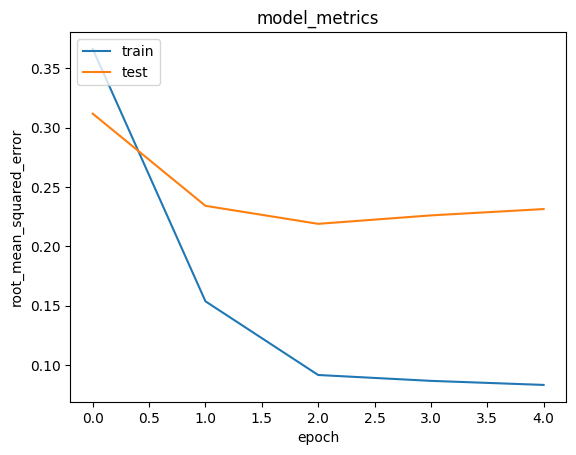

In [159]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Get course recommendation

In [160]:
courses

courseName  rating  \
0     Write A Feature Length Screenplay For Film Or ...     4.8   
1     Business Strategy: Business Model Canvas Analy...     4.8   
2                         Silicon Thin Film Solar Cells     4.1   
3                                  Finance for Managers     4.8   
4          Retrieve Data using Single-Table SQL Queries     4.6   
...                                                 ...     ...   
3735  Capstone: Retrieving, Processing, and Visualiz...     4.6   
3736                   Patrick Henry: Forgotten Founder     4.9   
3737  Business intelligence and data analytics: Gene...     4.6   
3738                                Rigid Body Dynamics     4.6   
3739  Architecting with Google Kubernetes Engine: Pr...     4.7   

                                          description_x  \
0     Write a Full Length Feature Film Script  In th...   
1     By the end of this guided project, you will be...   
2     This course consists of a general presentation...   
3     When it comes to numbers, there is always more...   
4     In this course you�ll learn how to effectively...   
...                                                 ...   
3735  In the capstone, students will build a series ...   
3736  �Give me liberty, or give me death:� Rememberi...   
3737  �Megatrends� heavily influence today�s organis...   
3738  This course teaches dynamics, one of the basic...   
3739  In this course, "Architecting with Google Kube...   

                                                 skills  \
0     Drama  Comedy  peering  screenwriting  film  D...   
1     Finance  business plan  persona (user experien...   
2     chemistry  physics  Solar Energy  film  lambda...   
3     accounts receivable  dupont analysis  analysis...   
4     Data Analysis  select (sql)  database manageme...   
...                                                 ...   
3735  Databases  syntax  analysis  web  Data Visuali...   
3736  retirement  Causality  career  history of the ...   
3737  analytics  tableau software  Business Intellig...   
3738  Angular  Mechanical Design  fluid mechanics  F...   
3739  bigtable  bigquery  SQL  Google Cloud Platform...   

                                          description_y  courses_df  skills_df  
0     Write a Full Length Feature Film Script  In th...           0          0  
1     By the end of this guided project, you will be...           1          1  
2     This course consists of a general presentation...           2          2  
3     When it comes to numbers, there is always more...           3          3  
4     In this course you�ll learn how to effectively...           4          4  
...                                                 ...         ...        ...  
3735  In the capstone, students will build a series ...        3329       3337  
3736  �Give me liberty, or give me death:� Rememberi...        3330       3338  
3737  �Megatrends� heavily influence today�s organis...        3331       3339  
3738  This course teaches dynamics, one of the basic...        3332       3340  
3739  In this course, "Architecting with Google Kube...        3333       3341  

[3740 rows x 7 columns]

In [161]:
# Mengambil sample course
course_sample = df.courses_df.sample(1).iloc[0]

# Mengambil course sesuai sample course
courses_enrolled = courses[courses.courses_df == course_sample]
courses_enrolled

courseName  rating  \
884  Portfolio and Risk Management     4.7   
885  Portfolio and Risk Management     4.7   
886  Portfolio and Risk Management     4.4   
887  Portfolio and Risk Management     4.4   

                                         description_x  \
884  In this course, you will gain an understanding...   
885  In this course, you will gain an understanding...   
886  This course teaches you the concepts of risk a...   
887  This course teaches you the concepts of risk a...   

                                                skills  \
884  value at risk  Leadership and Management  port...   
885  value at risk  Leadership and Management  port...   
886  Finance  Risk Management  stock  Leadership an...   
887  Finance  Risk Management  stock  Leadership an...   

                                         description_y  courses_df  skills_df  
884  In this course, you will gain an understanding...         794        796  
885  This course teaches you the concepts of risk a...         794        796  
886  In this course, you will gain an understanding...         794        797  
887  This course teaches you the concepts of risk a...         794        797

In [162]:
# Mengambil course yang tidak di-enroll
# Operator bitwise (~), https://docs.python.org/3/reference/expressions.html
courses_not_enrolled = courses[~courses['courseName'].isin(courses_enrolled.courseName.values)]['courseName']
print("Course not enrolled:", courses_not_enrolled)
courses_not_enrolled = list(
    set(courses_not_enrolled)
    .intersection(set(cn_to_cn_encoded.keys()))
)

Course not enrolled: 0       Write A Feature Length Screenplay For Film Or ...
1       Business Strategy: Business Model Canvas Analy...
2                           Silicon Thin Film Solar Cells
3                                    Finance for Managers
4            Retrieve Data using Single-Table SQL Queries
                              ...                        
3735    Capstone: Retrieving, Processing, and Visualiz...
3736                     Patrick Henry: Forgotten Founder
3737    Business intelligence and data analytics: Gene...
3738                                  Rigid Body Dynamics
3739    Architecting with Google Kubernetes Engine: Pr...
Name: courseName, Length: 3736, dtype: object


In [163]:
# Encoding course_not_enrolled dengan sample skill
courses_not_enrolled = [[cn_to_cn_encoded.get(x)] for x in courses_not_enrolled]
courses_not_enrolled

[[3280],
 [1141],
 [226],
 [2266],
 [1789],
 [413],
 [2512],
 [2733],
 [876],
 [947],
 [3065],
 [1287],
 [1398],
 [1265],
 [703],
 [650],
 [1055],
 [44],
 [492],
 [1782],
 [2768],
 [513],
 [2601],
 [1826],
 [3123],
 [1932],
 [254],
 [718],
 [1722],
 [1614],
 [2638],
 [2375],
 [1849],
 [2832],
 [1701],
 [2461],
 [1933],
 [3131],
 [68],
 [746],
 [3033],
 [1350],
 [1941],
 [3021],
 [3193],
 [1329],
 [1285],
 [1091],
 [1686],
 [991],
 [1439],
 [2353],
 [2232],
 [2252],
 [2359],
 [2883],
 [1591],
 [2207],
 [2827],
 [1937],
 [1736],
 [2959],
 [3234],
 [1802],
 [625],
 [2251],
 [1089],
 [1270],
 [1442],
 [2637],
 [2229],
 [824],
 [475],
 [931],
 [2899],
 [2225],
 [93],
 [1709],
 [2517],
 [2611],
 [648],
 [1463],
 [3210],
 [1324],
 [1914],
 [2211],
 [592],
 [2006],
 [1122],
 [2127],
 [2484],
 [2165],
 [2851],
 [2566],
 [2813],
 [3073],
 [3150],
 [805],
 [99],
 [3034],
 [2826],
 [1534],
 [161],
 [3173],
 [553],
 [3223],
 [1322],
 [1489],
 [758],
 [713],
 [843],
 [780],
 [2917],
 [1576],
 [1804]

In [164]:
# Encode course_sample
skills_encoder = skill_to_skill_encoded.get(course_sample)
if skills_encoder is None and isinstance(course_sample, np.int64):
  skills_encoder = course_sample
skills_courses_array = np.hstack(
    ([[skills_encoder]] * len(courses_not_enrolled), courses_not_enrolled)
)
skills_courses_array

array([[ 794, 3280],
       [ 794, 1141],
       [ 794,  226],
       ...,
       [ 794,  524],
       [ 794, 2118],
       [ 794, 1186]])

In [165]:
# Prediksi model
ratings = model.predict(skills_courses_array).flatten()

105/105 [==============================] - 0s 1ms/step


# Model Evaluation

Content Based Filtering

In [166]:
# Membuat fungsi prediction
course_columns = ['courseName','rating', 'skills']
def get_recommendations(title, similarity_data=cosine_sim_df, similar_type='cosine', items=courses[course_columns], k=10):

    # Mengambil data dengan similarity terbesar (cosine) dan terkecil (euclidean) dari index yang ada
    if (similar_type == 'cosine'):
        index = similarity_data.loc[:,title].to_numpy().argpartition(
        range(-1, -k, -1))
        closest = similarity_data.columns[index[-1:-(k+2):-1]]
        score = similarity_data.iloc[index[-1:-(k+2):-1],
                                     similarity_data.columns.get_loc(title)
                                    ].reset_index(drop=True)
    else:
        index = similarity_data.loc[:,title].to_numpy().argpartition(
        range(k+1))
        closest = similarity_data.columns[index[:(k+2)]]
        score = similarity_data.iloc[index[:(k+2)],
                                     similarity_data.columns.get_loc(title)
                                    ].reset_index(drop=True)

    # Drop courseName agar course yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(title, errors='ignore')
    result = pd.DataFrame(closest).merge(items).head(k)
    result['rating'] = score
    return result

In [167]:
# Mengambil contoh course
courses.loc[courses.courseName.isin([
    'Software Security',
]), course_columns]

courseName  rating  \
1114  Software Security     4.6   

                                                 skills  
1114  internet security  SQL  security  Security Sof...

Cosine Similarity

In [168]:
print(get_recommendations('Software Security').to_markdown())

|    | courseName                                                          |   rating | skills                                                                                                                                                                                                                                                             |
|---:|:--------------------------------------------------------------------|---------:|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  0 | Cloud Systems Software                                              | 1        | orchestration (computing)  i/o virtualization  health  architecture neutral distribution format  Cloud-Based Integration  Software Framework  System Programming  SQL  Cloud Engineering  multitier architecture infor

Euclidean Distance

In [169]:
print(get_recommendations('Software Security', euclidean_dist_df, 'euclidean').to_markdown())

|    | courseName                                                          |   rating | skills                                                                                                                                                                                                                                                             |
|---:|:--------------------------------------------------------------------|---------:|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  0 | Cloud Systems Software                                              |  0       | orchestration (computing)  i/o virtualization  health  architecture neutral distribution format  Cloud-Based Integration  Software Framework  System Programming  SQL  Cloud Engineering  multitier architecture infor

Colaborative Filtering

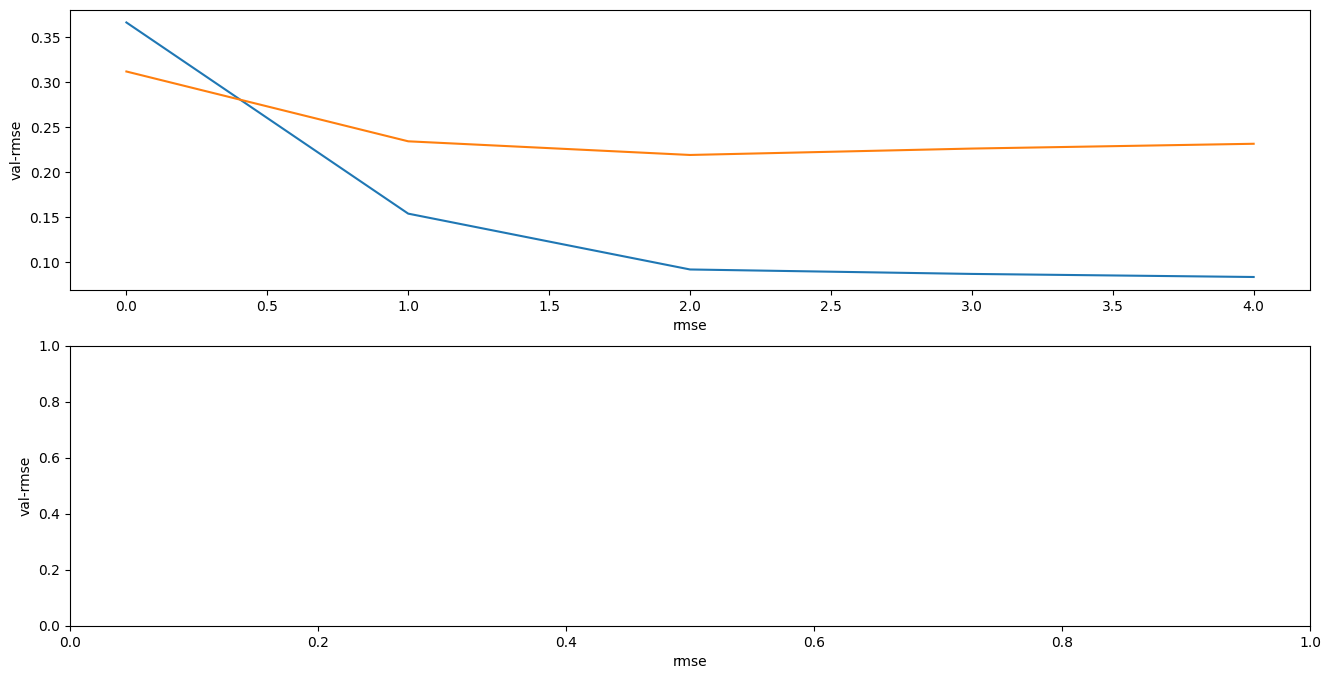

In [170]:
fig, ax = plt.subplots(2, figsize=(16, 8))

mt = history.history['root_mean_squared_error']
mv = history.history['val_root_mean_squared_error']

ax[0].plot(mt)
ax[0].plot(mv)

for plot in ax.flat:
    plot.set(xlabel='rmse', ylabel='val-rmse')

plt.show()

In [172]:
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_course_ids = [
    cn_encoded_to_cn.get(courses_not_enrolled[x][0]) for x in top_ratings_indices
]

print('Menampilkan rekomendasi course: {}'.format(course_sample))
print('===' * 9)
print('Menampilkan course dengan rating tinggi')
print('----' * 8)

top_course_by_rating = (
    courses_enrolled.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(15)
    .rating.values
)

courses_rows = courses[courses['rating'].isin(top_course_by_rating)]
for row in courses_rows.itertuples():
    print(row.courseName)

print('----' * 8)
print('Top 10 rekomendasi course Coursera')
print('----' * 8)

recommended_courses = courses[courses['rating'].isin(recommended_course_ids)]
for row in recommended_courses.itertuples():
    print(row.courseName)


Menampilkan rekomendasi course: 794
Menampilkan course dengan rating tinggi
--------------------------------
Building Test Automation Framework using Selenium and TestNG
Esports Management Capstone Project
Business Statistics and Analysis Capstone
Parallel programming
COVID-19 - A clinical update
How to Create Text Effects in GIMP
The Music of American English Pronunciation
COBOL Programming with VSCode
Cryptography and Hashing Overview
Postman - Intro to APIs (without coding)
Foundations of Objective-C App Development
Programming Mobile Applications for Android Handheld Systems: Part 2
Analyzing Market Attractiveness Using Creately
Personal Leadership Development Planning and Leading High Performing Teams
Voices of Social Change
Severe to Profound Intellectual Disability: Circles of Care and Education
Japanese for beginners 2
Age of Cathedrals
Magna Carta and its Legacies: Freedom and protest
Genetics and Society: A Course for Educators
Russian History: from Lenin to Putin
Successful 